# LangChain으로 데이터 분석하기1 - Excel

### 필요 모듈을 불러옵니다.

## 발급 받은 OpenAI key를 불러옵니다.

In [8]:
import os

os.environ["OPENAI_API_KEY"] = ""

## 데이터 시각화
- 전처리한 데이터프레임에 대해 LangChain을 이용하여 데이터 분석을 수행하고 시각화를 통해 인사이트를 추출해보도록 하겠습니다.

In [9]:
import pandas as pd

df = pd.read_csv("../data/preprocessed_bus_data3.csv")

In [10]:
df

,노선번호,노선명,정류장ID,ARS번호,역명,승차총승객수,하차총승객수,연,월,일,총승객수
0,100,하계동~용산구청,100000002,01002,창경궁.서울대학교병원(00031),55.0,52.0,2024,9,1,107.0
1,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000695,07616,이매촌한신.서현역.AK프라자(00022),11.0,64.0,2024,9,1,75.0
2,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000613,47105,이매촌한신.서현역.AK프라자(00004),56.0,8.0,2024,9,1,64.0
3,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000537,47635,성남역.백현마을3단지(00021),1.0,7.0,2024,9,1,8.0
4,9401-1,푸른마을~서울시중부기술교육원.블루스퀘어,206000536,47634,백현마을4단지(00020),2.0,18.0,2024,9,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...
40145,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900062,13592,한국예술원(00008),23.0,7.0,2024,9,1,30.0
40146,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900062,13592,한국예술원(00037),11.0,28.0,2024,9,1,39.0
40147,N15,우이동성원아파트~남태령역,119000049,20142,엔지니어링회관(00080),2.0,0.0,2024,9,1,2.0
40148,서대문02,독립문역.천연뜨란채아파트~독립문극동아파트,112900069,13583,충정로역7번출구(00007),180.0,123.0,2024,9,1,303.0


### 이전 프로젝트에서 정의했던 reset_agent 함수를 다시 불러옵니다.

In [16]:
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI


def reset_agent(df, model='gpt-4o',temperature=0, verbose=True):
    return create_pandas_dataframe_agent(ChatOpenAI(temperature=0, model=model), df, verbose=verbose, allow_dangerous_code=True, handle_parsing_errors=True)

agent = reset_agent(df)

#### 그래프에 한글 깨짐을 해결하기 위한 코드입니다. NanumGothic 폰트를 사용하겠습니다. - 출처: 네이버, 네이버 문화재단

In [17]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# 반드시 글꼴 주소 입력해주세요!
fe = fm.FontEntry(fname='NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})
plt.rcParams["axes.unicode_minus"] = False

#### 경고 메세지가 뜨지 않게 하기 위한 코드입니다.

In [18]:
import warnings
warnings.filterwarnings("ignore")

### Point 1. 가장 많이 승차한 정류장 Top 10
- Tip: "예쁘게"라는 말을 프롬프트에 써주면, x축의 단지명 글자들이 겹치지 않도록 시각화해줍니다.


In [14]:
agent.invoke("승차총승객수 컬럼을 기준으로 가장 많이 승차한 정류장 Top 10을 알려줘.")



> Entering new AgentExecutor chain...
Thought: To find the top 10 bus stops with the highest number of passengers based on the "승차총승객수" column, I need to sort the dataframe by this column in descending order and then select the top 10 rows.
Action: python_repl_ast
Action Input: df.nlargest(10, '승차총승객수')        노선번호                노선명      정류장ID  ARS번호                 역명  승차총승객수  \
16321    01A        예장주차장~예장주차장  102000226  03320      남산서울타워(00009)  2689.0   
20556   5515    신동아아파트~청림동현대아파트  120000228  21330      서울대입구역(00022)  1998.0   
17762   강북06       강북보건소~미아사거리역  108900168  09579    미아사거리전철역(00019)  1933.0   
23296  서대문03       홍은2동주민센터~신촌역  112900230  13802       신촌전철역(00015)  1927.0   
26156  영등포01      신도림역~구로디지털단지역  116900161  17909    신도림역2번출구(00001)  1897.0   
18575   관악02       낙성대역~서울대신공학관  120900119  21785        낙성대역(00039)  1884.0   
19866   금천03  가산디지털단지역~구로디지털단지역  117900140  18503    가산디지털단지역(00001)  1842.0   
8872    7734      진관공영차고지~홍대입구역  113000422  14015     

{'input': '승차총승객수 컬럼을 기준으로 가장 많이 승차한 정류장 Top 10을 알려줘.',
 'output': 'The top 10 bus stops with the highest number of passengers based on the "승차총승객수" column are:\n\n1. 남산서울타워(00009) with 2689 passengers\n2. 서울대입구역(00022) with 1998 passengers\n3. 미아사거리전철역(00019) with 1933 passengers\n4. 신촌전철역(00015) with 1927 passengers\n5. 신도림역2번출구(00001) with 1897 passengers\n6. 낙성대역(00039) with 1884 passengers\n7. 가산디지털단지역(00001) with 1842 passengers\n8. 홍대입구역(00050) with 1820 passengers\n9. 당산역.지하철2호선(00019) with 1766 passengers\n10. 신림역(00012) with 1755 passengers'}

1. 남산서울타워(00009)
2. 서울대입구역(00022)
3. 미아사거리전철역(00019)
4. 신촌전철역(00015)
5. 신도림역2번출구(00001)
6. 낙성대역(00039)
7. 가산디지털단지역(00001)
8. 홍대입구역(00050)
9. 당산역.지하철2호선(00019)
10. 신림역(00012)

#### 승차 인원 Top 10 정류장의 시각화



> Entering new AgentExecutor chain...
Thought: To create the desired bar chart, I need to first identify the top 10 stops with the highest '승차총승객수'. Then, I will use matplotlib to plot these values. Let's start by finding the top 10 stops.
Action: python_repl_ast
Action Input: df.nlargest(10, '승차총승객수')[['역명', '승차총승객수']]                      역명  승차총승객수
16321      남산서울타워(00009)  2689.0
20556      서울대입구역(00022)  1998.0
17762    미아사거리전철역(00019)  1933.0
23296       신촌전철역(00015)  1927.0
26156    신도림역2번출구(00001)  1897.0
18575        낙성대역(00039)  1884.0
19866    가산디지털단지역(00001)  1842.0
8872        홍대입구역(00050)  1820.0
25712  당산역.지하철2호선(00019)  1766.0
18640         신림역(00012)  1755.0I have identified the top 10 stops with the highest '승차총승객수'. Now, I will use matplotlib to create a bar chart with these values. Let's proceed with plotting the graph.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Data for plotting
top_10_stops = df.nlargest(10, '승차총승객수')[['

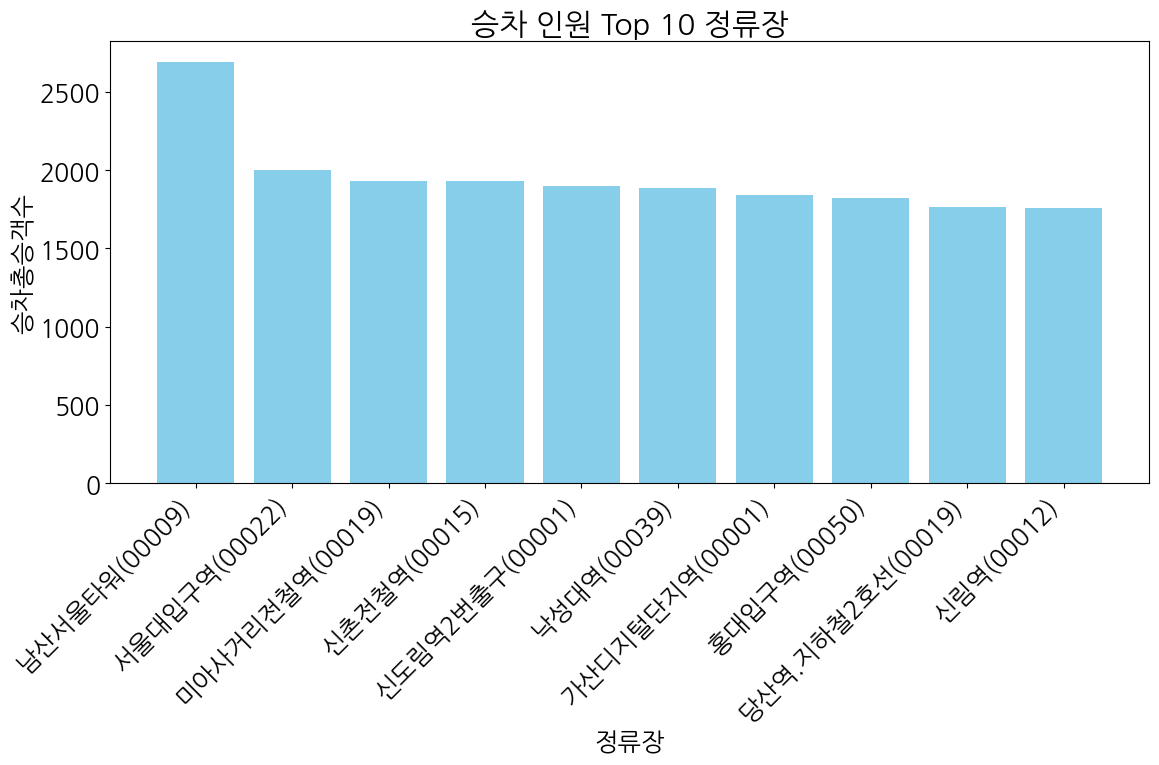

I have successfully created a bar chart displaying the top 10 stops with the highest '승차총승객수'. The x-axis represents the stop names, and the y-axis represents the number of passengers boarding. The chart is titled '승차 인원 Top 10 정류장'. 

Final Answer: A bar chart titled '승차 인원 Top 10 정류장' has been created, showing the top 10 stops with the highest boarding passenger numbers.

> Finished chain.


{'input': "승차총승객수가 가장 많은 정류장 Top 10을 x축으로, 승차총승객수를 y축으로 하는 막대 그래프를 예쁘게 그려줘. 제목은 '승차 인원 Top 10 정류장'으로 해줘.",
 'output': "A bar chart titled '승차 인원 Top 10 정류장' has been created, showing the top 10 stops with the highest boarding passenger numbers."}

In [19]:
agent.invoke("승차총승객수가 가장 많은 정류장 Top 10을 x축으로, 승차총승객수를 y축으로 하는 막대 그래프를 예쁘게 그려줘. 제목은 '승차 인원 Top 10 정류장'으로 해줘.")

### Point 2. 평균 승차 인원이 가장 많은 노선Top 10

In [20]:
# TODO: 노선번호를 기준으로 평균 승차 인원이 가장 많은 노선 Top10을 질문하는 프롬프트를 작성하고 실행해주세요.

agent.invoke(____________________________________________)



> Entering new AgentExecutor chain...

Thought: To find the top 10 routes with the highest average boarding passengers, I need to group the dataframe by '노선번호', calculate the mean of '승차총승객수' for each group, and then sort the results in descending order to get the top 10.
Action: python_repl_ast
Action Input: df.groupby('노선번호')['승차총승객수'].mean().sort_values(ascending=False).head(10)노선번호
01A      368.880000
동대문01    355.666667
용산02     283.638889
동작01     278.465116
5515     255.939394
관악07     254.000000
01B      247.200000
금천03     245.387097
272      243.354167
서대문03    239.700000
Name: 승차총승객수, dtype: float64I now know the final answer.

Final Answer: The top 10 routes with the highest average boarding passengers are:
1. 01A - 368.88
2. 동대문01 - 355.67
3. 용산02 - 283.64
4. 동작01 - 278.47
5. 5515 - 255.94
6. 관악07 - 254.00
7. 01B - 247.20
8. 금천03 - 245.39
9. 272 - 243.35
10. 서대문03 - 239.70

> Finished chain.


{'input': '노선번호 기준으로 평균 승차 인원을 계산해서 가장 승차 인원이 많은 노선 Top 10을 알려줘.',
 'output': 'The top 10 routes with the highest average boarding passengers are:\n1. 01A - 368.88\n2. 동대문01 - 355.67\n3. 용산02 - 283.64\n4. 동작01 - 278.47\n5. 5515 - 255.94\n6. 관악07 - 254.00\n7. 01B - 247.20\n8. 금천03 - 245.39\n9. 272 - 243.35\n10. 서대문03 - 239.70'}

1. 01A
2. 동대문01
3. 용산02
4. 동작01
5. 5515
6. 관악07
7. 01B
8. 금천03
9. 272
10. 서대문03



> Entering new AgentExecutor chain...
Thought: To create the desired bar chart, I need to calculate the average 승차총승객수 (boarding passengers) for each 노선번호 (route number), sort them in descending order, and then plot the top 10. I will use matplotlib and seaborn for plotting to make the graph visually appealing.

Action: I will first calculate the average 승차총승객수 for each 노선번호 and then sort them to get the top 10.

Action Input: 
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average 승차총승객수 for each 노선번호
average_boarding = df.groupby('노선번호')['승차총승객수'].mean().sort_values(ascending=False).head(10)

average_boarding
```
I will first calculate the average 승차총승객수 for each 노선번호 and then sort them to get the top 10. is not a valid tool, try one of [python_repl_ast].To calculate the average 승차총승객수 for each 노선번호 and sort them to get the top 10, I will use the `python_repl_ast` tool to execute the necessary Python commands.

Action: python_re

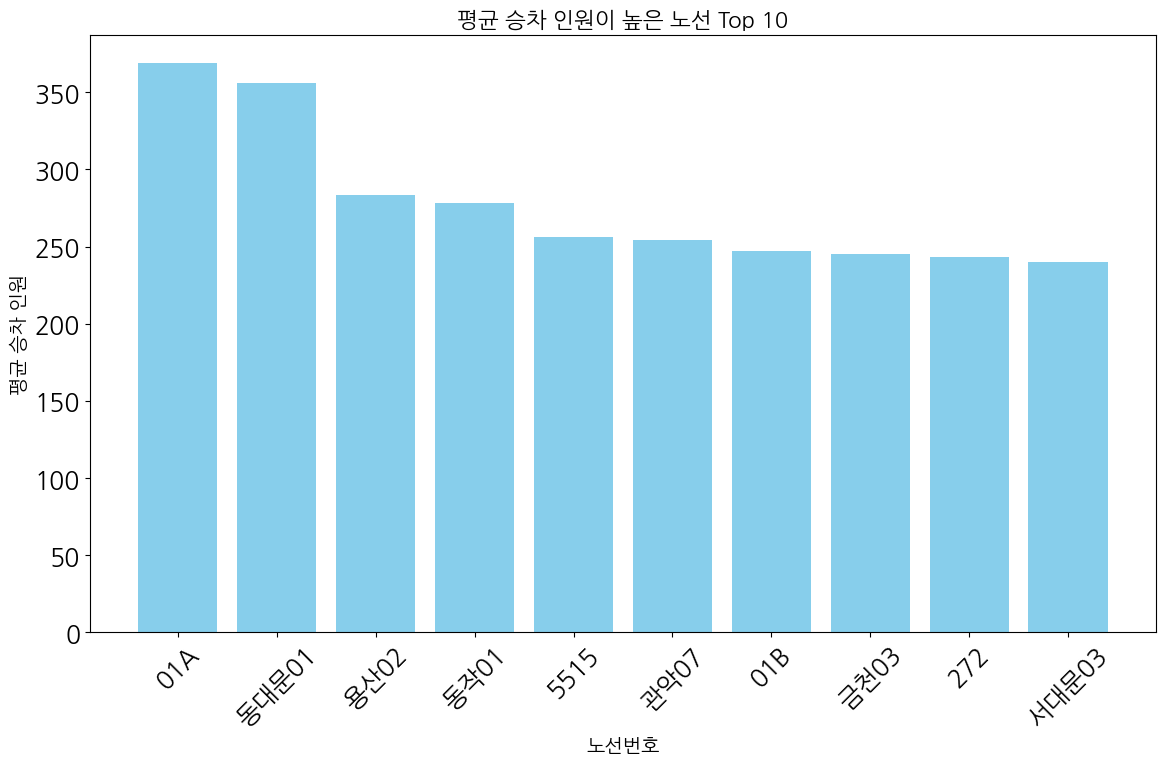

I have successfully created a bar chart using `matplotlib` to visualize the top 10 routes with the highest average boarding passengers. The chart displays the route numbers on the x-axis and the average boarding passengers on the y-axis, with the title "평균 승차 인원이 높은 노선 Top 10".

Final Answer: A bar chart has been created using `matplotlib` to show the top 10 routes with the highest average boarding passengers, titled "평균 승차 인원이 높은 노선 Top 10".

> Finished chain.


{'input': "노선번호를 기준으로 평균 승차 인원 Top 10을 x축으로, 평균 승차 인원을 y축으로 하는 막대 그래프를 예쁘게 그려줘. 제목은 '평균 승차 인원이 높은 노선 Top 10'으로 해줘.",
 'output': 'A bar chart has been created using `matplotlib` to show the top 10 routes with the highest average boarding passengers, titled "평균 승차 인원이 높은 노선 Top 10".'}

In [21]:
# TODO: 노선번호를 기준으로 평균 승차 인원이 가장 많은 노선 Top10을 x축, 평균 승차 인원을 y축으로 하는 막대그래프를 만드는 프롬프트를 작성하고 실행해주세요.

agent.invoke(____________________________________________)

### Point 3. 승차와 하차의 비율 분석




> Entering new AgentExecutor chain...


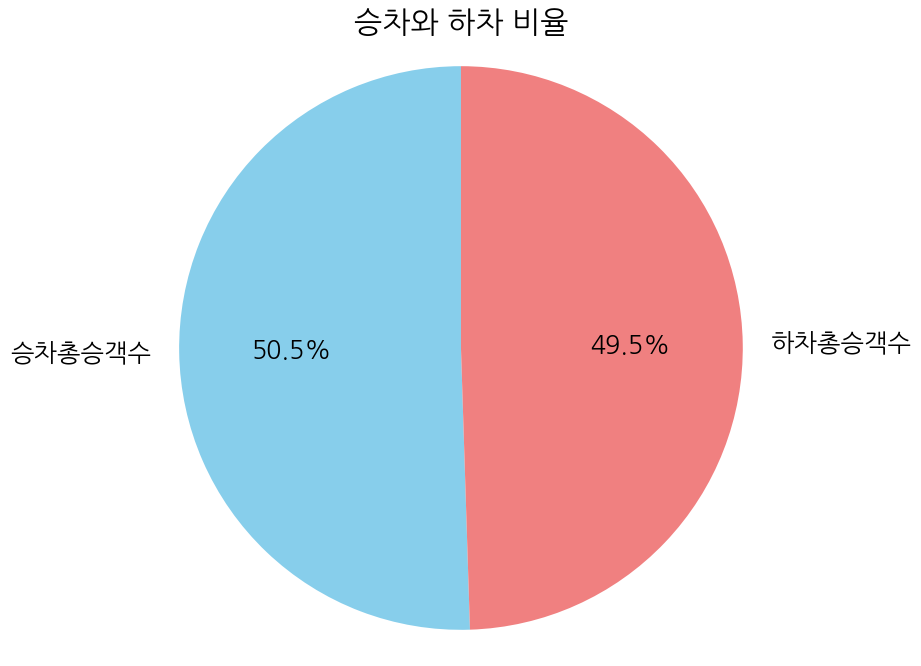

Thought: To create a pie chart showing the ratio of 승차총승객수 to 하차총승객수, I need to calculate the total of each and then plot these values using matplotlib. I will also add percentage labels to each section of the pie chart and set the title to '승차와 하차 비율'.
Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Calculate total 승차총승객수 and 하차총승객수
total_승차 = df['승차총승객수'].sum()
total_하차 = df['하차총승객수'].sum()

# Data for pie chart
labels = ['승차총승객수', '하차총승객수']
sizes = [total_승차, total_하차]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('승차와 하차 비율')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
```I have created a pie chart that shows the ratio of 승차총승객수 to 하차총승객수. The chart includes percentage labels for each section and is titled '승차와 하차 비율'. 

Final Answer: A pie chart has been created to show the ratio of 승차총승

{'input': "승차총승객수와 하차총승객수의 비율에 대한 pie chart를 예쁘게 그려줘. 각 부분에 비율을 %로 표시하고 제목은 '승차와 하차 비율'로 해줘.",
 'output': "A pie chart has been created to show the ratio of 승차총승객수 to 하차총승객수, with percentage labels and the title '승차와 하차 비율'."}

In [24]:
# TODO: 승차총승객수와 하차총승객수의 비율을 확인하는 파이차트를 %로 표시하여 그리는 막대그래프를 만드는 프롬프트를 작성하고 실행해주세요.

agent.invoke(____________________________________________)